In [15]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import plotly.express as px # plotting

#Reading file through read_csv method
df = pd.read_csv('/kaggle/input/airline-baggage-complaints-time-series-dataset/baggagecomplaints.csv')

In [16]:
# Change date to a more readable format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# the above occassionally does an error, but it should work

/tmp/ipykernel_30/2999560.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


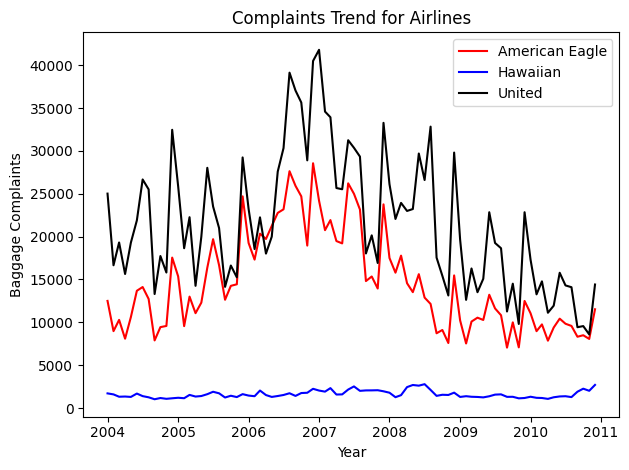

In [17]:
# Filter, leaving only Airline, Date, and Total Baggage Complaints, then rename accordingly
baggage = df.groupby(['Airline','Date'])['Baggage'].sum().reset_index()
baggage = baggage.rename(columns={'Baggage':'Baggage Complaints'})

# Filter, leaving only Airline, Date, and Total Enplaned, renaming accordingly, to be used later for percentage
enplaned = df.groupby(['Airline','Date'])['Enplaned'].sum().reset_index()
enplaned = enplaned.rename(columns={'Enplaned':'Passengers'})

# Manual separating of companies (American Eagle, Hawaiian, and United)
a = baggage['Date'][0:84]
b = baggage['Baggage Complaints'][0:84]

c = baggage['Date'][84:168]
d = baggage['Baggage Complaints'][84:168]

e = baggage['Date'][168:252]
f = baggage['Baggage Complaints'][168:252]

# Plotting
plt.plot(a, b, color='red', linestyle='-',label='American Eagle')
plt.plot(c, d, color='blue', linestyle='-',label='Hawaiian')
plt.plot(e, f, color='black', linestyle='-',label='United')

# Labeling
plt.xlabel('Year')
plt.ylabel('Baggage Complaints')
plt.title('Complaints Trend for Airlines')
plt.tight_layout()
plt.legend()


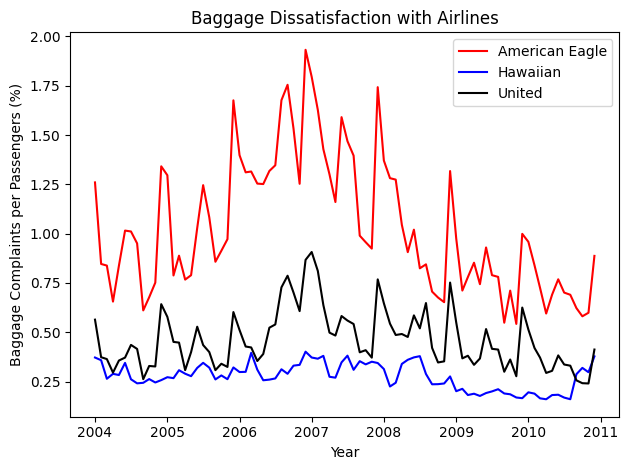

In [18]:
# Next graph

# Given the date, find out the percentage of baggage complaints to passengers for each airline company
derived = []
for x in range(len(baggage)):
    derived.append(100 * baggage.iloc[x]["Baggage Complaints"] / enplaned.iloc[x]['Passengers'])

# Manual separating of companies

# override b using derived
b = derived[0:84]

# override d using derived
d = derived[84:168]

# override f using derived
f = derived[168:252]

# Plotting
plt.plot(a, b, color='red', linestyle='-',label='American Eagle')
plt.plot(c, d, color='blue', linestyle='-',label='Hawaiian')
plt.plot(e, f, color='black', linestyle='-',label='United')

# Labeling
plt.xlabel('Year')
plt.ylabel('Baggage Complaints per Passengers (%)')
plt.title('Baggage Dissatisfaction with Airlines')
plt.tight_layout()
plt.legend()